## Plotting abundances (with model errors)
This routine calculates the posterior and plots abundances from both the model (stopped at 9 Gyr) and proto-solar predictions.

In [ ]:
%pylab inline

from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.63,-2.81,-0.83,-0.29,0.55,0.50]) # Parameters found by model
a = extract_parameters_and_priors(a.p0, a) # To update to new model
abundances, names = cem2(a) # predict abundances

In [ ]:
# Load in proto-sun abundances and errors (remove last value (solar age))
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance = []
proto_sun_error = []
model_abundance = []
#names = np.asarray(names) # For compatibility

# Calculate model abundance in same order as proto-sun
for i,item in enumerate(proto_sun.dtype.names[:-1]):
    for j,jtem in enumerate(names):
        if jtem == item:
            model_abundance.append(abundances[j])
    #model_abundance.append(abundances[np.where(names==item)])
    proto_sun_abundance.append(proto_sun[0][i])
    proto_sun_error.append(proto_sun[1][i])
    
# Load abundance names ([X/Fe]) in correct order
abundance_names = []
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')

In [ ]:
# Plot figure
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 20
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
plt.plot(np.arange(len(abundance_names)),model_abundance,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(abundance_names)),proto_sun_abundance,xerr=None,yerr=proto_sun_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='proto-solar')
plt.ylim((-0.5,0.5))
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")
plt.title("Comparing proto-solar model and predicted abundances")
plt.legend()
savefig('karakas10/AbundancePlot')

## SAVE THIS PLOT

In [ ]:
## Now restructure the chain

from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10_neural/')

In [ ]:
## Plot the posterior and prior values and correlation grid
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas10_neural/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [ ]:
%pylab inline

In [ ]:
from Chempy.cem_function import cem2
from Chempy.parameter import ModelParameters
a = ModelParameters()

In [ ]:
a.UseNeural = False
abundances,names = cem2(a)

In [ ]:
a.UseNeural = True
abundances2,names2 = cem2(a)

In [ ]:
np.array(abundances)-np.array(abundances2)

In [ ]:
a = ModelParameters()
param = a.p0 + np.random.rand(6)*0.1
a.UseNeural = False
from Chempy.cem_function import posterior_function_predictions
post,abun,name = posterior_function_predictions(param,a)

In [ ]:
a = ModelParameters()
a.UseNeural = True
from Chempy.cem_function import posterior_function_predictions
post2,abun2,name2 = posterior_function_predictions(param,a)

In [ ]:
post2

In [ ]:
N = 20
error = np.zeros((N,22))
for i in range(N):
    a = ModelParameters()
    a.UseNeural = False
    param = a.p0*(1+np.random.rand(6)*0.1)
    post,abun,_ = posterior_function_predictions(param,a)
    a.UseNeural = True
    post2,abun2,_ = posterior_function_predictions(param,a)
    for j in range(22):
        error[i,j] = (abun[j]-abun2[j])
    if i % 10 == 0:
        print(i)

In [ ]:
element_err = np.zeros(22)
err_err = np.zeros(22)
for i in range(22):
    element_err[i] = np.mean(error[:,i])
    err_err[i] = np.std(error[:,i])

In [ ]:
element_err

We expect average errors of zero - no modulus here

In [ ]:
err_err

In [ ]:
plt.figure()
plt.errorbar(range(22),element_err,err_err)

In [ ]:
a = ModelParameters()
from Chempy.cem_function import cem_real2
a.UseNeural = False
est,names = cem_real2(a)

In [ ]:
a.UseNeural = True
a = ModelParameters()
est2,names2 = cem_real2(a)

In [ ]:
print(est)
print(est2)

In [ ]:
len(est)

In [ ]:
len(est2)

In [ ]:
names==names2

In [ ]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('elements/All/')

## Swap to 5^6 size training sample and retest

Populating the interactive namespace from numpy and matplotlib
Training epoch 0 of 5000 complete
Training epoch 1000 of 5000 complete
Training epoch 2000 of 5000 complete
Training epoch 3000 of 5000 complete
Training epoch 4000 of 5000 complete


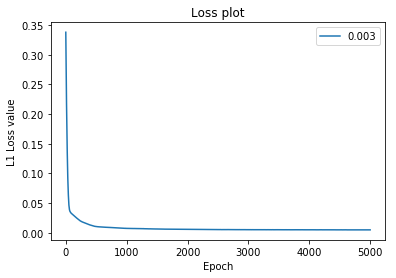

In [1]:
%pylab inline
from Chempy.neural import create_network
learning_rate = 0.003
epoch, loss = create_network(learning_rate=learning_rate)

In [7]:
N = 100
from Chempy.parameter import ModelParameters
a = ModelParameters()
from Chempy.cem_function import posterior_function_predictions
error = np.zeros((N,22))
for i in range(N):
    a = ModelParameters()
    a.UseNeural = False
    param = a.p0*(1+np.random.rand(6)*0.1)
    post,abun,_ = posterior_function_predictions(param,a)
    a.UseNeural = True
    post2,abun2,_ = posterior_function_predictions(param,a)
    for j in range(22):
        error[i,j] = (abun[j]-abun2[j])
    if i % 10 == 0:
        print(i)

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:160: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


0
10
20
30
40
50
60
70
80
90


In [8]:
element_err = np.zeros(22)
err_err = np.zeros(22)
for i in range(22):
    element_err[i] = np.mean(error[:,i])
    err_err[i] = np.std(error[:,i])

/home/philcox/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


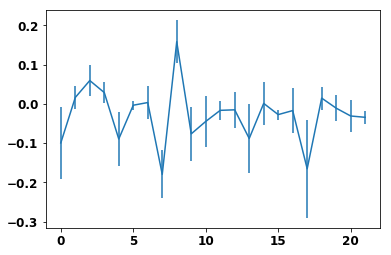

In [12]:
plt.figure()
plt.errorbar(range(22),element_err,err_err)
font = {'family' : 'serif',
        'size'   : 12}
plt.rc('font', **font)